In [ ]:
from typing import TypedDict

import matplotlib.pyplot as plt
import numpy as np


class Tile(TypedDict):
    top: int
    bottom: int
    left: int
    right: int


# For random shuffling of tiles, so that the
# solution is not always the same (optional).
# rng = np.random.default_rng(42)


# Define the tile set (using numbers for colors)
tiles = [
    Tile({"top": 1, "bottom": 2, "left": 2, "right": 2}),
    Tile({"top": 2, "bottom": 3, "left": 1, "right": 2}),
    Tile({"top": 3, "bottom": 1, "left": 2, "right": 1}),
]

tiles_2 = [
    Tile({"top": 1, "bottom": 2, "left": 2, "right": 1}),
    Tile({"top": 2, "bottom": 1, "left": 1, "right": 2}),
    Tile({"top": 1, "bottom": 1, "left": 3, "right": 1}),
    Tile({"top": 3, "bottom": 2, "left": 1, "right": 3}),
]


def can_place_tile(grid, tile, row, col):
    """
    Check if a tile can be placed at position (row, col) in the grid.
    """
    # Check top constraint
    if row > 0 and (tile_above := grid[row - 1][col]):
        if tile_above["bottom"] != tile["top"]:
            return False

    # Check left constraint
    if col > 0 and (tile_left := grid[row][col - 1]):
        if tile_left["right"] != tile["left"]:
            return False

    return True


def solve(grid, row, col, n):
    """
    Recursive backtracking to solve the tiling problem.
    """
    # If we filled all rows, the grid is complete
    if row == n:
        return True

    # Move to the next row if the column is complete
    next_row, next_col = (row + 1, 0) if col == n - 1 else (row, col + 1)

    # Try placing each tile in the current cell
    # Randomly shuffle the tiles for fun (optional!!!)
    # rng.shuffle(tiles)
    for tile in tiles:
        if can_place_tile(grid, tile, row, col):
            # Place the tile
            grid[row][col] = tile
            # Recur for the next cell
            if solve(grid, next_row, next_col, n):
                return True
            # Backtrack: remove the tile
            grid[row][col] = None

    # If no tile fits, return False
    return False


def is_tilable(n):
    """
    Check if an n x n grid can be tiled using the given tiles.
    """
    # Initialize an empty n x n grid
    grid = [[None for _ in range(n)] for _ in range(n)]
    # Try to solve the tiling problem
    if solve(grid, 0, 0, n):
        print("Tiling is possible. Visualizing the result...")
        visualize_grid_with_triangles(grid)
        return True
    else:
        print("Tiling is not possible.")
        return False


def visualize_grid_with_triangles(grid):
    """
    Visualize the grid using matplotlib with triangular sections for tiles.
    """
    n = len(grid)
    fig, ax = plt.subplots(figsize=(n, n))

    # Define colors for edges
    colors = {
        1: "blue",
        2: "orange",
        3: "green",
    }

    # Draw each tile as four triangles
    for x in range(n):
        for y in range(n):
            tile = grid[x][y]

            # Coordinates of the four triangles (tile corner
            X = np.array(
                [
                    [x, y],  # top-left
                    [x, y + 1],  # top-right
                    [x + 1, y],  # bottom-left
                    [x + 1, y + 1],  # bottom-right
                    [x + 0.5, y + 0.5],  # center
                ]
            )
            triangles = [
                (X[0], X[1], X[-1]),  # Top triangle
                (X[1], X[3], X[-1]),  # Right triangle
                (X[2], X[3], X[-1]),  # Bottom triangle
                (X[0], X[2], X[-1]),  # Left triangle
            ]

            # Draw triangles with corresponding colors
            ax.add_patch(plt.Polygon(triangles[0], color=colors[tile["top"]]))
            ax.add_patch(plt.Polygon(triangles[1], color=colors[tile["right"]]))
            ax.add_patch(plt.Polygon(triangles[2], color=colors[tile["bottom"]]))
            ax.add_patch(plt.Polygon(triangles[3], color=colors[tile["left"]]))

            # Add tile outline
            ax.add_patch(
                plt.Polygon(X[[0, 1, 3, 2]], edgecolor="white", fill=False, lw=3)
            )

    # Configure the grid visualization
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_aspect("equal")
    ax.axis("off")
    plt.savefig("tiling.png")
    plt.show()

Tiling is possible. Visualizing the result...


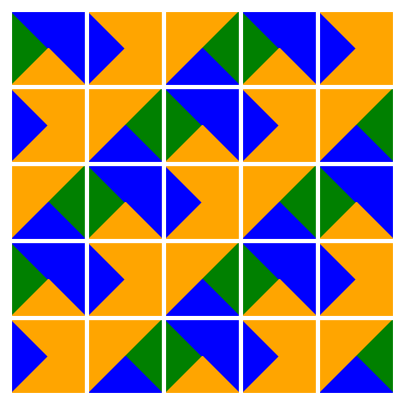

True

In [30]:
n = 5
is_tilable(n)

Tiling is possible. Visualizing the result...


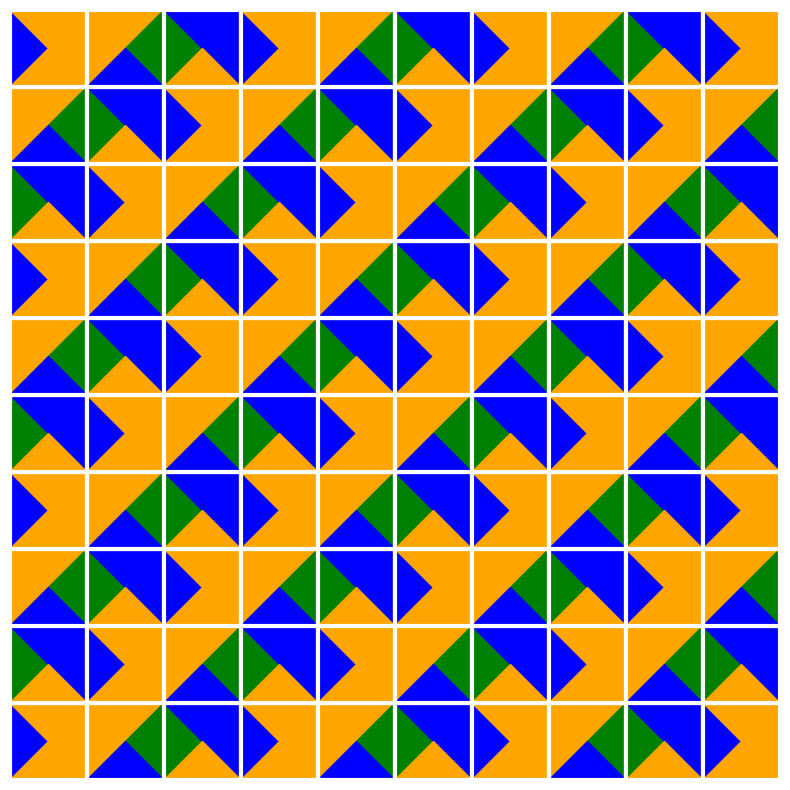

True

In [31]:
n = 10
is_tilable(n)